In [93]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt

In [3]:
uploaded = files.upload()

Saving housing.data to housing.data


In [102]:
data = pd.read_csv(io.BytesIO(uploaded['housing.data']), sep=r'\s+',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [135]:
y = data.iloc[:, -1].values
x = data.iloc[:, :-1].values
x_norm = (x - x.mean(axis=0)) / x.std(axis=0)
y_norm = y - y.mean()

In [136]:
U, S, Vt = np.linalg.svd(x_norm, full_matrices = False)

In [137]:
S_plus = np.diag(1/S)

In [138]:
beta_hat = Vt.T @ S_plus @ U.T @ y_norm

In [139]:
y_hat = x_norm @ beta_hat + y.mean()

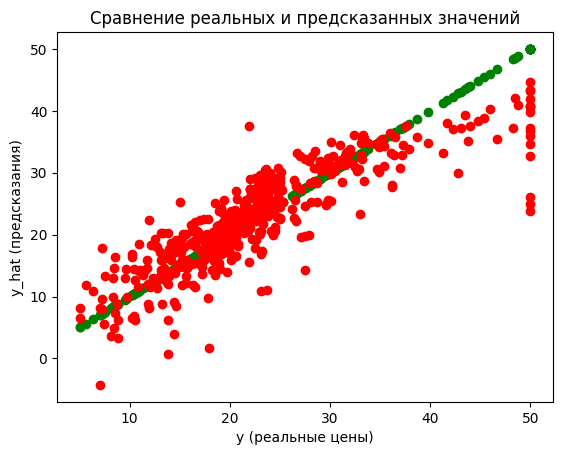

In [142]:
plt.scatter(y, y, color='green', label='y = y (реальные)')
plt.scatter(y, y_hat, color='red', label='y_hat (предсказания)')
plt.xlabel('y (реальные цены)')
plt.ylabel('y_hat (предсказания)')
plt.title('Сравнение реальных и предсказанных значений')
plt.show()

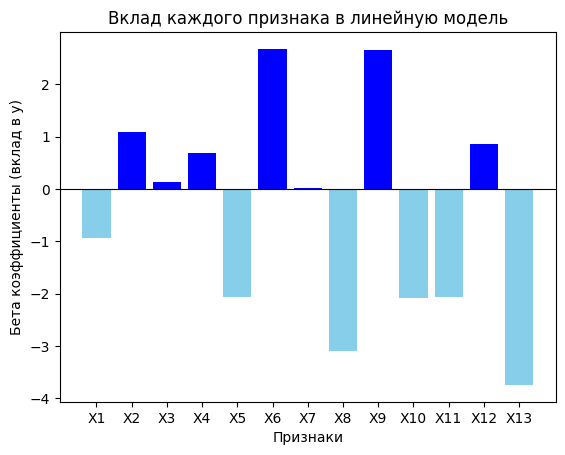

In [156]:
X_names = [f'X{i+1}' for i in range(x_norm.shape[1])]
plt.figure()
colors = ['skyblue' if b < 0 else 'blue' for b in beta_hat]
plt.bar(X_names, beta_hat, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel("Признаки")
plt.ylabel("Бета коэффициенты (вклад в y)")
plt.title("Вклад каждого признака в линейную модель")
plt.show()